In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# get the dataset from Yahoo.
start = '2017-01-01'
end = '2020-01-01'
df = web.DataReader('NFLX', 'yahoo', start=start, end=end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,128.190002,124.309998,124.959999,127.489998,9437900,127.489998
2017-01-04,130.169998,126.550003,127.489998,129.410004,7843600,129.410004
2017-01-05,132.750000,128.899994,129.220001,131.809998,10185500,131.809998
2017-01-06,133.880005,129.809998,132.080002,131.070007,10657900,131.070007
2017-01-09,131.990005,129.889999,131.479996,130.949997,5771800,130.949997
...,...,...,...,...,...,...
2019-12-24,335.700012,331.600006,334.010010,333.200012,2019300,333.200012
2019-12-26,336.459991,332.010010,334.600006,332.630005,3589900,332.630005
2019-12-27,333.820007,326.010010,332.959991,329.089996,5036100,329.089996


In [3]:
# resetting index to access Date as a column
df.reset_index(inplace=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,128.190002,124.309998,124.959999,127.489998,9437900,127.489998
1,2017-01-04,130.169998,126.550003,127.489998,129.410004,7843600,129.410004
2,2017-01-05,132.750000,128.899994,129.220001,131.809998,10185500,131.809998
3,2017-01-06,133.880005,129.809998,132.080002,131.070007,10657900,131.070007
4,2017-01-09,131.990005,129.889999,131.479996,130.949997,5771800,130.949997


In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02,754.000000
mean,275.165716,266.999933,271.296128,271.255504,8.638108e+06,271.255504
std,84.899140,81.921969,83.555865,83.418412,5.273732e+06,83.418412
min,128.190002,124.309998,124.959999,127.489998,2.019300e+06,127.489998
25%,188.270000,183.457500,186.032497,185.692493,5.233175e+06,185.692493
50%,296.860001,287.480011,292.345001,291.565002,7.070500e+06,291.565002
75%,352.435005,341.927490,347.387505,346.647491,1.046368e+07,346.647491
max,423.209991,413.079987,421.380005,418.970001,5.841040e+07,418.970001


In [5]:
# check for nan values
df.isna().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [6]:
df.shape

(754, 7)

In [7]:
# correlation
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998569,0.998997,0.998897,0.240014,0.998897
Low,0.998569,1.000000,0.998696,0.998921,0.204778,0.998921
Open,0.998997,0.998696,1.000000,0.997458,0.223486,0.997458
Close,0.998897,0.998921,0.997458,1.000000,0.224395,1.000000
Volume,0.240014,0.204778,0.223486,0.224395,1.000000,0.224395
Adj Close,0.998897,0.998921,0.997458,1.000000,0.224395,1.000000


<AxesSubplot:>

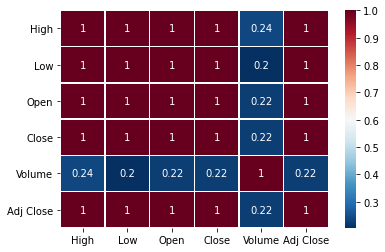

In [8]:
# visualize correlation
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

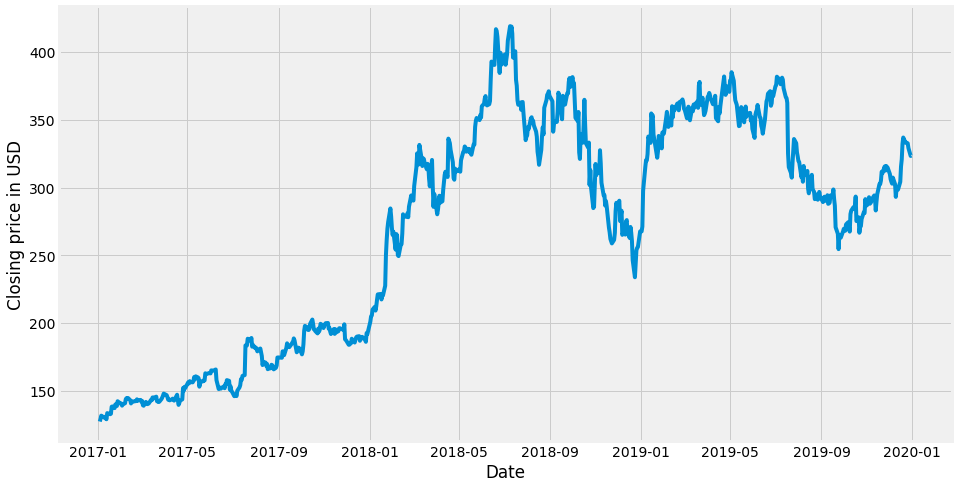

In [9]:
xy_df = df[['Date', 'High', 'Low', 'Open', 'Close']]
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.plot(xy_df['Date'], xy_df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.show()

In [10]:
# convert datetime to separate year and month and day columns so that no error occurs while training.
xy_df['Year'] = df['Date'].dt.year
xy_df['Month'] = df['Date'].dt.month
xy_df['Day'] = df['Date'].dt.day
xy_df.head(10)

<ipython-input-10-0396481fadf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_df['Year'] = df['Date'].dt.year


,Date,High,Low,Open,Close,Year,Month,Day
0,2017-01-03,128.190002,124.309998,124.959999,127.489998,2017,1,3
1,2017-01-04,130.169998,126.550003,127.489998,129.410004,2017,1,4
2,2017-01-05,132.750000,128.899994,129.220001,131.809998,2017,1,5
3,2017-01-06,133.880005,129.809998,132.080002,131.070007,2017,1,6
4,2017-01-09,131.990005,129.889999,131.479996,130.949997,2017,1,9
5,2017-01-10,132.220001,129.289993,131.270004,129.889999,2017,1,10
6,2017-01-11,131.500000,129.250000,130.910004,130.500000,2017,1,11
7,2017-01-12,130.850006,128.500000,130.630005,129.179993,2017,1,12
8,2017-01-13,133.929993,130.580002,131.149994,133.699997,2017,1,13
9,2017-01-17,135.399994,132.089996,135.039993,132.889999,2017,1,17


In [11]:
# reorder cols appropriately for final dataset.
xy_df = xy_df[[ 'Day', 'Month','Year', 'High', 'Low', 'Open', 'Close']]
xy_df.head(10)

,Day,Month,Year,High,Low,Open,Close
0,3,1,2017,128.190002,124.309998,124.959999,127.489998
1,4,1,2017,130.169998,126.550003,127.489998,129.410004
2,5,1,2017,132.750000,128.899994,129.220001,131.809998
3,6,1,2017,133.880005,129.809998,132.080002,131.070007
4,9,1,2017,131.990005,129.889999,131.479996,130.949997
5,10,1,2017,132.220001,129.289993,131.270004,129.889999
6,11,1,2017,131.500000,129.250000,130.910004,130.500000
7,12,1,2017,130.850006,128.500000,130.630005,129.179993
8,13,1,2017,133.929993,130.580002,131.149994,133.699997
9,17,1,2017,135.399994,132.089996,135.039993,132.889999


In [12]:
# create input and output datasets X and y.
X = xy_df.iloc[:, :6]
y = xy_df.iloc[:, 6]
print(X.head())
print()
print(y.head())
print()
print(X.shape)
print(y.shape)

   Day  Month  Year        High         Low        Open
0    3      1  2017  128.190002  124.309998  124.959999
1    4      1  2017  130.169998  126.550003  127.489998
2    5      1  2017  132.750000  128.899994  129.220001
3    6      1  2017  133.880005  129.809998  132.080002
4    9      1  2017  131.990005  129.889999  131.479996

0    127.489998
1    129.410004
2    131.809998
3    131.070007
4    130.949997
Name: Close, dtype: float64

(754, 6)
(754,)


In [13]:
# split the dataset into training(80%) and testing datasets(20%) in
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
print(X.shape)
print(y.shape)

(754, 6)
(754,)


In [15]:
# Check out the shapes of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(603, 6)
(603,)
(151, 6)
(151,)


In [16]:
# create model
lr_model = LinearRegression()

In [17]:
# train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# predict y using x
y_predict = lr_model.predict(X_test)

In [19]:
# score of the model.
lr_model.score(X_test, y_test)

0.9992816747787961

In [20]:
# Cross Validation to evaluate the performance of model
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, shuffle=True, random_state=100)
results_kfold = model_selection.cross_val_score(lr_model, X_test, y_test.astype('int'), cv=kfold)
print('Accuracy: ', results_kfold.mean() * 100)

Accuracy:  99.86878186240246


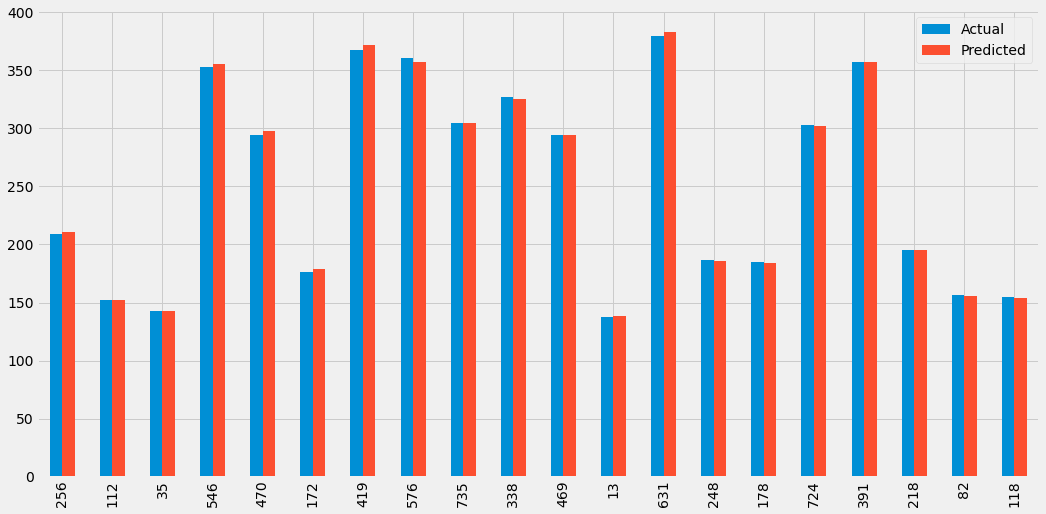

In [21]:
res_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
res_df.head(20).plot(kind='bar', figsize=(16,8))
plt.show()

In [22]:
# setting up a df for visualisation
vis_df = pd.DataFrame({'Actual': xy_df['Close'], 'Predicted': lr_model.predict(X)})
vis_df['Date'] = df['Date']
vis_df

,Actual,Predicted,Date
0,127.489998,127.889138,2017-01-03
1,129.410004,129.683366,2017-01-04
2,131.809998,132.617914,2017-01-05
3,131.070007,132.421761,2017-01-06
4,130.949997,131.140448,2017-01-09
...,...,...,...
749,333.200012,333.257820,2019-12-24
750,332.630005,333.817475,2019-12-26
751,329.089996,327.926720,2019-12-27
752,323.309998,323.888844,2019-12-30


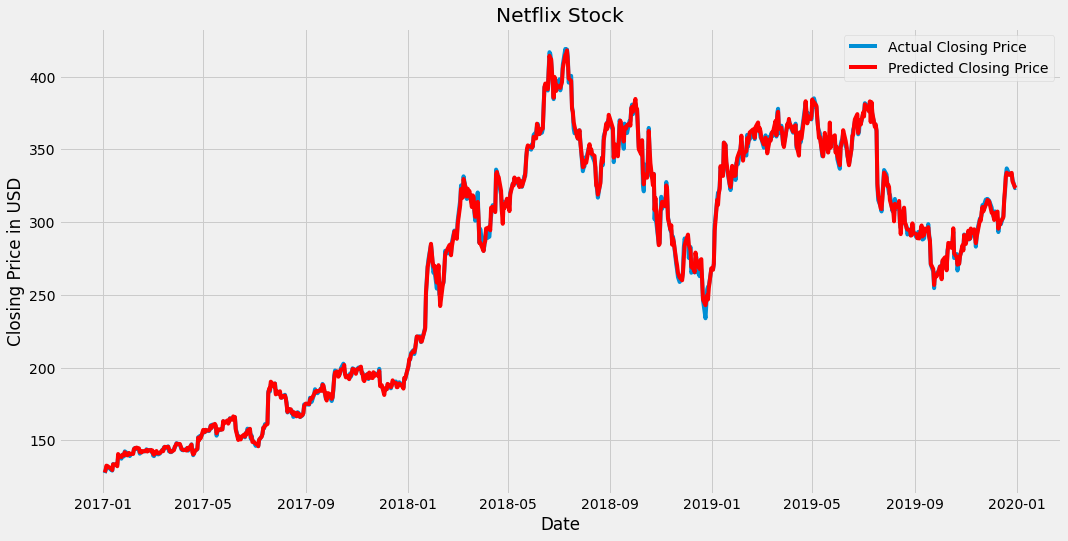

In [26]:
# visualizing the complete df data
plt.figure(figsize=(16,8))
plt.plot(vis_df['Date'], vis_df['Actual'], label = 'Actual Closing Price')
plt.plot(vis_df['Date'],vis_df['Predicted'], c='r', label='Predicted Closing Price')
plt.title('Netflix Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.show()

In [24]:
# save the model for later use
import joblib
filename = 'trained_linear_regression_model'
joblib.dump(lr_model, filename)

['trained_linear_regression_model']

In [25]:
# test whether the saved model works or not
loaded_model = joblib.load(filename)
loaded_model.score(X_test, y_test)

0.9992816747787961